In [ ]:
!rm -rf tesis_mapeo_distribucion

In [17]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion.git

fatal: destination path 'tesis_mapeo_distribucion' already exists and is not an empty directory.


In [18]:
import sys
sys.path.append('/content/tesis_mapeo_distribucion/Final')

In [1]:
!pip install gurobipy 
!pip install umap
!pip install scikit-learn-extra
!pip install pingouin

In [2]:
from frontera_v4 import Frontera

2023-05-05 00:32:12.849330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
import scipy.stats as stats
import pingouin as pg

import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [7]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 800, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 9
       )

In [246]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 1200, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 2, 
        shuffle      = True, 
        random_state = 10
       )

# **Datos Artificiales #1**

In [65]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [49]:
X.shape

(600, 2)

In [66]:
X

array([[-0.31658683,  4.5708382 ],
       [ 1.64265316,  3.84306754],
       [ 0.8433895 ,  4.00599645],
       ...,
       [ 2.40704763,  1.27689919],
       [-2.15246105,  3.91001909],
       [ 1.90811845,  4.64375231]])

In [50]:
y.shape

(600,)

In [11]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    #colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    plot_bgcolor='white',  # Fondo blanco
    #paper_bgcolor='white',  # Fondo blanco del papel
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

## LSH

In [51]:
%run frontera_v4.ipynb

In [52]:
%%time
# 3 vectores
n = 10
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y, percentil_min=0, percentil_max=20, num_vectors=3, method='LSH')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática LSH _ART_1: 1.627135504189825 +/- 0.10240724567228637
CPU times: user 186 ms, sys: 639 ms, total: 825 ms
Wall time: 68 ms


In [53]:
frontera.plot_frontera_2D(0,1,'X1','X2')

## R-BM

In [54]:
#from frontera_v4 import Frontera

In [36]:
%run frontera_v4.ipynb

In [63]:
%%time
n = 10
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=5, percentil_max=25, N_points_frontera=8, Closeness_Factor=1)
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática R-BM _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática R-BM _ART_1: 1.5668472879417286 +/- 0.0
CPU times: user 593 ms, sys: 1.78 s, total: 2.37 s
Wall time: 191 ms


In [34]:
punto_frontera

array([[-1.00926425,  4.57316359],
       [-0.25738088,  1.8574959 ],
       [ 0.25356862,  2.85411382],
       [ 0.89035246,  2.44872358],
       [ 2.06120273,  3.25113242],
       [ 3.41064354,  2.73333731]])

In [64]:
frontera.plot_frontera_2D(0,1,'X1','X2')

In [99]:
# Obtén los índices aleatorios para seleccionar los puntos
indices_aleatorios = np.random.choice(range(matriz_combinada.shape[0]), size=6, replace=False)
# Crea la matriz seleccionada a partir de los puntos aleatorios
matriz_seleccionada = matriz_combinada[indices_aleatorios]
plot_frontera_2D_ran(frontera,matriz_seleccionada,0,1)

In [88]:
def plot_frontera_2D_ran(clase,other_dic, col_1, col_2):
        # Set initial state for the loop
        door = True
        next_color = 0

        # Loop through the categories in the dictionary
        for key, value in clase.dic_categorias.items():
            # If it's the first iteration, create a new plot with the first category's data
            if door:
                fig = go.Figure(data=[go.Scatter(x=value[:, col_1], y=value[:, col_2],
                                                 mode='markers',
                                                 name=key,
                                                 marker=dict(
                                                     size=6,
                                                     # Set color to an array/list of desired values
                                                     # color=self.color_list[next_color],
                                                     colorscale='picnic',  # Choose a colorscale
                                                     opacity=0.7)
                                                 )])
                # Change the door variable to False, indicating that the first iteration is done
                door = False
                # Increment the color index
                next_color += 1
            else:
                # For the rest of the categories, add them to the existing plot
                fig.add_trace(go.Scatter(x=value[:, col_1], y=value[:, col_2],
                                         mode='markers',
                                         name=key,
                                         marker=dict(
                                             size=6,
                                             # Set color to an array/list of desired values
                                             # color=self.color_list[next_color],
                                             colorscale='picnic',  # Choose a colorscale
                                             opacity=0.7)
                                         ))
                # Increment the color index
                next_color += 1
                

        fig.add_trace(go.Scatter(x=other_dic[:, col_1], y=other_dic[:, col_2],
                                 mode='markers',
                                 name='RANDOM',
                                 marker=dict(
                                     symbol=300,
                                     size=50,
                                     color='black',  # Set color to a random integer value
                                     # colorscale='Viridis',  # Choose a colorscale
                                     opacity=1)
                                ))


        # Update the layout properties of the plot
        fig.update_layout(
            autosize=True,
            width=1200,
            height=750,
            plot_bgcolor='white',  # Fondo blanco
            paper_bgcolor='white',  # Fondo blanco del papel
            #xaxis=dict(gridcolor='lightgray'),  # Líneas de referencia del eje X en gris claro
            #yaxis=dict(gridcolor='lightgray'),  # Líneas de referencia del eje Y en gris claro
            margin=dict(l=10, r=10, b=10, t=20))
        
        # Display the plot
        fig.show()

## Prototypes

In [672]:
%run frontera_v4.ipynb

In [60]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, Closeness_Factor=1.9, method='prototypes')
    punto_frontera, labels = frontera.frontier()
        
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Prototypes _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Prototypes _ART_1: 1.4404664265002511 +/- 0.0
CPU times: user 1.67 s, sys: 1.12 s, total: 2.79 s
Wall time: 1.49 s


In [61]:
punto_frontera

array([[ 2.82667347,  1.92710249],
       [ 0.03182382,  3.89373763],
       [ 0.1216    ,  1.36786807],
       [ 2.01949945,  3.27840901],
       [ 1.81324769,  2.41592483],
       [-0.18108518,  3.99149508]])

In [62]:
frontera.plot_frontera_2D(0,1,'X1','X2')

## Medoids

In [21]:
%run frontera_v4.ipynb

In [58]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, num_cluster=6, method='KM')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática LSH _ART_1: 1.6702676023624192 +/- 0.0
CPU times: user 55.5 ms, sys: 148 ms, total: 204 ms
Wall time: 16.5 ms


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).



In [44]:
# optimal_k = 6
punto_frontera

array([[ 1.52256473,  1.98841339],
       [-0.18433654,  1.29916272],
       [-0.44779083,  3.81046744],
       [ 1.74952306,  3.11990669],
       [ 0.62283833,  2.68731314],
       [-0.00924066,  2.83195232]])

In [59]:
frontera.plot_frontera_2D(0,1,'X1','X2')

## TEST 

In [67]:
# Obtén todas las matrices del diccionario
todas_las_matrices = list(frontera.dic_min_dst.values())

# Combina todas las matrices en una sola matriz utilizando np.concatenate
matriz_combinada = np.concatenate(todas_las_matrices)

# Obtener los índices de las filas únicas
matriz_combinada, indices = np.unique(matriz_combinada, axis=0, return_index=True)

In [28]:
df_1 = pd.DataFrame(matriz_combinada, columns=['X1', 'X2'])
df_1['muestra'] = 'Input'
df_2 = pd.DataFrame(punto_frontera, columns=['X1', 'X2'])
df_2['muestra'] = 'Output'

# Combina los DataFrames por filas utilizando concat()
df_combined = pd.concat([df_1, df_2])

In [26]:
## Test de Normalidad
# Dividir los datos por categoría
datos_cat_A = df_combined.loc[df_combined['muestra'] == 'Input', 'X2']
datos_cat_B = df_combined.loc[df_combined['muestra'] == 'Output', 'X2']

# Realizar la prueba de bondad de ajuste para la categoría A
resultado_A = stats.kstest(datos_cat_A, 'norm')
resultado_A = stats.normaltest(datos_cat_A)
resultado_A = stats.shapiro(datos_cat_A)
p_valor_A = resultado_A.pvalue
print("Categoría A:")
print(f"Estadístico de prueba: {resultado_A.statistic}")
print(f"P-valor: {p_valor_A}")

# Realizar la prueba de bondad de ajuste para la categoría B
#resultado_B = stats.normaltest(datos_cat_B)
### Realizar pruebas de normalidad con 30 < datos quita potencia a la prueba
resultado_B = stats.shapiro(datos_cat_B)
p_valor_B = resultado_B.pvalue
print("Categoría B:")
print(f"Estadístico de prueba: {resultado_B.statistic}")
print(f"P-valor: {p_valor_B}")

Categoría A:
Estadístico de prueba: 0.984027624130249
P-valor: 0.021219661459326744
Categoría B:
Estadístico de prueba: 0.9295032024383545
P-valor: 0.5762711763381958


In [79]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_combined, dv='X1', group='muestra', method='levene')

,W,pval,equal_var
levene,0.309084,0.57889,True


In [80]:
pg.homoscedasticity(data=df_combined, dv='X2', group='muestra', method='levene')

,W,pval,equal_var
levene,0.864646,0.353609,True


In [83]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=datos_cat_A, y=datos_cat_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,583.0,two-sided,0.891312,-0.033688,0.516844


In [72]:
entropy_df1 = renyi_entropy(matriz_combinada)
entropy_df2 = renyi_entropy(punto_frontera)
entropy_df3 = renyi_entropy(matriz_seleccionada)

print('Entropía de Rényi cuadrática NF:', entropy_df1)
print('Entropía de Rényi cuadrática PCF:', entropy_df2)

n = 10000
valores = [] 
# Iterar n veces y guardar los valores en la lista
for _ in range(n):
    
    # Obtén los índices aleatorios para seleccionar los puntos
    indices_aleatorios = np.random.choice(range(matriz_combinada.shape[0]), size=5, replace=False)
    # Crea la matriz seleccionada a partir de los puntos aleatorios
    matriz_seleccionada = matriz_combinada[indices_aleatorios]
    
    resultado = renyi_entropy(matriz_seleccionada)
    valores.append(resultado)

# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática RANDOM _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática NF: [[2.12209779]]
Entropía de Rényi cuadrática PCF: [[1.56684729]]
Entropía de Rényi cuadrática RANDOM _ART_1: 1.3718088454337458 +/- 0.1426991030869405


In [212]:
# Uso de la función
df1 = matriz_combinada
df2 = punto_frontera
entropy_df1 = quadratic_renyi_entropy(df1)
entropy_df2 = quadratic_renyi_entropy(df2)
print('Entropía de Rényi cuadrática para df1:', entropy_df1)
print('Entropía de Rényi cuadrática para df2:', entropy_df2)

231
6
Entropía de Rényi cuadrática para df1: 0.7593112444363606
Entropía de Rényi cuadrática para df2: 3.777860550013416


In [ ]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Gráfico de distribución para la categoría A
sns.histplot(data=df_combined[df_combined['muestra'] == 'Input'], x='X2', kde=True, ax=axes[0])
axes[0].set_title('Distribución - Categoría A')

# Gráfico de distribución para la categoría B
sns.histplot(data=df_combined[df_combined['muestra'] == 'Output'], x='X2', kde=True, ax=axes[1])
axes[1].set_title('Distribución - Categoría B')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# **MNIST**

In [251]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Normalize the pixel values
#x_train = x_train / 255.0
#x_test = x_test / 255.0

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0]).T
# y_test_col = y_test.reshape(1, y_test.shape[0])

11490434/11490434 [==============================] - 3s 0us/step


In [300]:
x_train.shape

(60000, 28, 28)

In [252]:
# Fijamos una semilla para el generador de números aleatorios
semilla = 42

# Creamos un objeto generador de números aleatorios con la semilla fijada
rng = np.random.RandomState(semilla)

# Generamos una permutación aleatoria de los índices de ambos arrays
indices_perm = rng.permutation(1000)

# Obtenemos las muestras aleatorias utilizando los índices permutados
muestra_array1 = x_train_flat[indices_perm]/255.0
muestra_array2 = y_train_col[indices_perm]

In [254]:
#muestra_array2 = muestra_array2.reshape(1,-1)
print(muestra_array1.shape)
print(muestra_array2.shape)

(1000, 784)
(1000, 1)


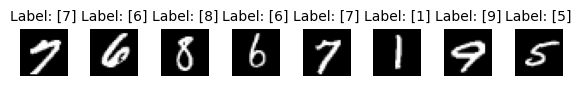

In [253]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=8):
    fig, axes = plt.subplots(1, num_images, figsize=(7, 7))
    axes = axes.ravel()

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}", fontsize=10)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Display first 10 filtered images from the training set
display_images(muestra_array1, muestra_array2)
plt.show()

In [382]:
%run frontera_v4.ipynb

In [378]:
frontera = Frontera(muestra_array1,muestra_array2,percentil_min=0, percentil_max=20, Closeness_Factor=180000)

In [383]:
frontera = Frontera(muestra_array1,muestra_array2,percentil_min=0, percentil_max=25, method='LSH')

In [384]:
# mnist:180000
vec, lab = frontera.frontier()

In [385]:
lab

[1]

In [367]:
frontera.X_1.shape

(4320, 784)

In [300]:
frontera.dic_categorias.get('X_0').shape

(97, 784)

In [301]:
frontera.dic_min_dst.get('X_0_with_X_1').shape

(19, 784)

In [302]:
frontera.Frontier_Point_A_X.get('FrontPoints:(0,X)').shape

(171, 784)

In [303]:
frontera.Frontier_Point.get('Frontier:(0,X)').shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [304]:
frontera.Frontier_Point.get('Frontier: ALL').shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [276]:
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

IndexError: index 1 is out of bounds for axis 0 with size 1

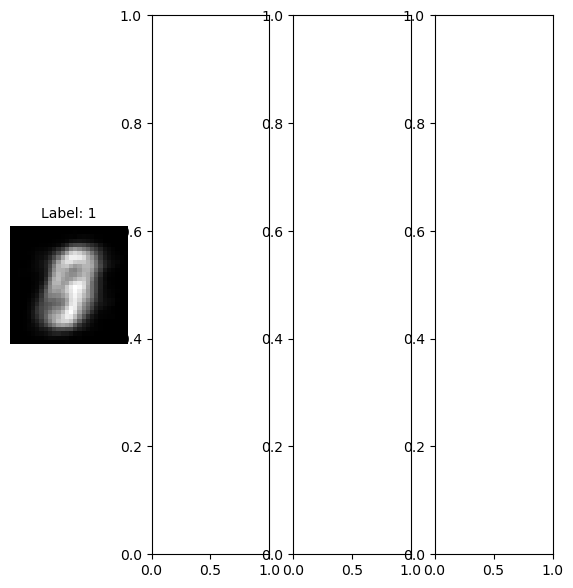

In [386]:
display_images(vec[0:], lab[0:],num_images=4)
plt.show()

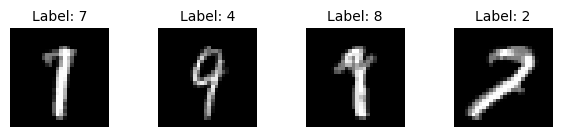

In [278]:
display_images(vec[4:], lab[4:],num_images=4)
plt.show()

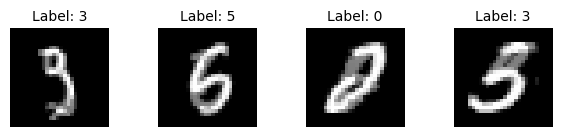

In [279]:
display_images(vec[8:], lab[8:],num_images=4)
plt.show()

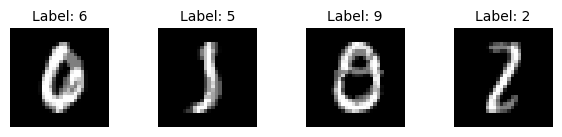

In [280]:
display_images(vec[12:], lab[12:],num_images=4)
plt.show()

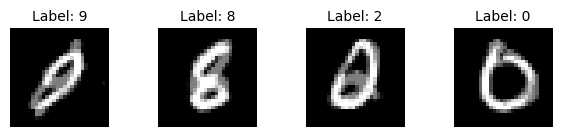

In [281]:
display_images(vec[16:], lab[16:],num_images=4)
plt.show()

In [154]:
# Obtener las imágenes originales
original_images = vec.reshape((22, 28, 28))

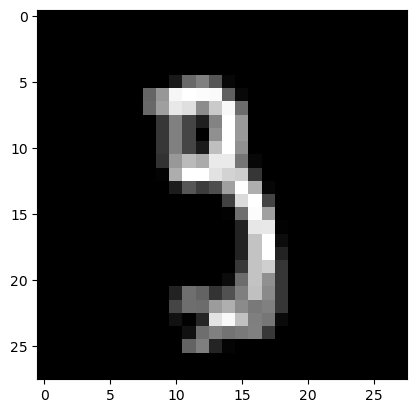

In [169]:
# Obtener el índice de la imagen a graficar
index = 0  # Cambia esto según el índice que desees graficar

# Obtener la imagen correspondiente al índice seleccionado
image = original_images[index]

# Graficar la imagen
plt.imshow(image, cmap='gray')
plt.show()

In [195]:
frontera.plot_muestra_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_frontera_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_UMAP()

# **IRIS**

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset de iris
iris = load_iris()

# Obtener las características (X) como una matriz NumPy
X = iris.data

# Obtener las etiquetas (y) como una matriz NumPy
y = iris.target

In [4]:
# Imprimir las formas de las matrices
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (150, 4)
Forma de y: (150,)


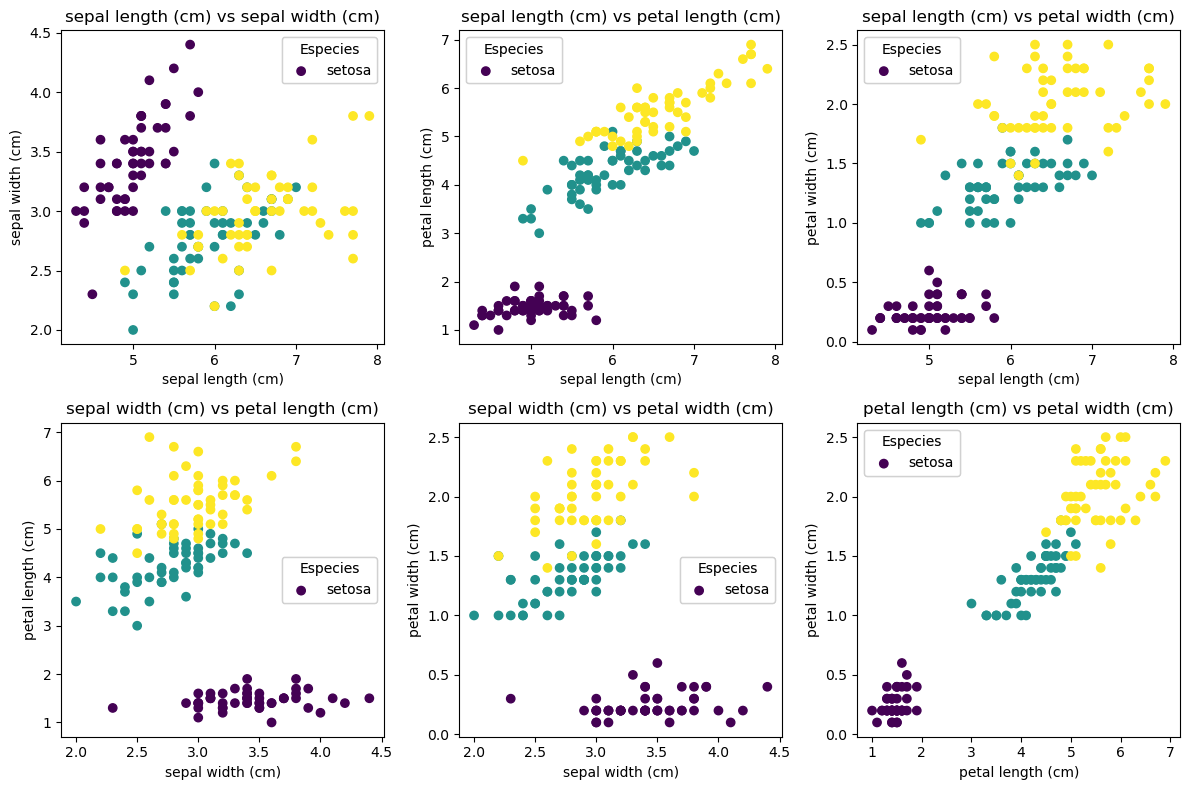

In [66]:
# Crear un diagrama de dispersión para cada par de características usando subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Índices de las características
feature_indices = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Pintar los scatter plots en los subplots correspondientes
for i, (x_index, y_index) in enumerate(feature_indices):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, x_index], X[:, y_index], c=y, cmap='viridis')
    ax.set_xlabel(iris.feature_names[x_index])
    ax.set_ylabel(iris.feature_names[y_index])
    ax.set_title(f"{iris.feature_names[x_index]} vs {iris.feature_names[y_index]}")
    legend = ax.legend(iris.target_names, title="Especies")
    ax.add_artist(legend)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los scatter plots
plt.show()

In [5]:
# Entrenar un árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Obtener la importancia de las características
importance = clf.feature_importances_

# Imprimir la importancia de las características
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {importance[i]}")

sepal length (cm): 0.0
sepal width (cm): 0.013333333333333329
petal length (cm): 0.06405595813204505
petal width (cm): 0.9226107085346216


In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## R-BM

In [36]:
%run frontera_v4.ipynb

In [37]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=2, Closeness_Factor=1 )
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática R-BM IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática R-BM IRIS: 0.9962935046461874 +/- 0.0
CPU times: user 5.03 ms, sys: 3.03 ms, total: 8.06 ms
Wall time: 6.84 ms


In [34]:
punto_frontera

array([[4.85, 2.9 , 2.6 , 0.6 ],
       [5.95, 3.1 , 4.8 , 1.8 ],
       [6.  , 3.1 , 4.85, 1.8 ],
       [6.15, 2.75, 5.1 , 1.55]])

In [38]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

## LSH

In [41]:
%run frontera_v4.ipynb

In [42]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y ,percentil_min=0, percentil_max=20, num_vectors=2, method='LSH')
    punto_frontera, labels = frontera.frontier() 
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática LSH IRIS: 1.3853664769462508 +/- 0.0
CPU times: user 7.89 ms, sys: 0 ns, total: 7.89 ms
Wall time: 6.79 ms


In [22]:
punto_frontera

array([[5.225     , 3.5125    , 1.675     , 0.375     ],
       [6.34166667, 3.04166667, 4.83333333, 1.64166667],
       [5.        , 3.        , 1.6       , 0.2       ],
       [5.76666667, 2.57916667, 4.4625    , 1.5       ]])

In [23]:
frontera.centroids.get('Centroid Group: 0')

array([5.225 , 3.5125, 1.675 , 0.375 ])

In [43]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

## Prototypes

In [704]:
%run frontera_v4.ipynb

In [44]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, Closeness_Factor=3, method='prototypes')
    punto_frontera, labels = frontera.frontier()  
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Prototypes IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Prototypes IRIS: 1.3862942935043179 +/- 0.0
CPU times: user 196 ms, sys: 22.6 ms, total: 219 ms
Wall time: 190 ms


In [19]:
punto_frontera

array([[5.4, 3.4, 1.7, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [5.8, 2.7, 5.1, 1.9]])

In [45]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

# Kmedoids

In [27]:
%run frontera_v4.ipynb

In [46]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, num_cluster=4, method='KM')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Kmedoids IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Kmedoids IRIS: 1.3862581220460772 +/- 0.0
CPU times: user 11.1 ms, sys: 29.5 ms, total: 40.6 ms
Wall time: 9.42 ms


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).



In [708]:
punto_frontera

array([[5. , 3.4, 1.6, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [5.5, 2.4, 3.7, 1. ]])

In [47]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

## TEST 

In [588]:
# Obtén todas las matrices del diccionario
todas_las_matrices = list(frontera.dic_min_dst.values())

# Combina todas las matrices en una sola matriz utilizando np.concatenate
matriz_combinada = np.concatenate(todas_las_matrices)

# Obtener los índices de las filas únicas
matriz_combinada, indices = np.unique(matriz_combinada, axis=0, return_index=True)

df_1 = pd.DataFrame(matriz_combinada, columns=['sepal length', 'sepal width','petal length','petal width'])
df_1['muestra'] = 'Input'
df_2 = pd.DataFrame(punto_frontera, columns=['sepal length', 'sepal width','petal length','petal width'])
df_2['muestra'] = 'Output'

# Combina los DataFrames por filas utilizando concat()
df_combined = pd.concat([df_1, df_2])

In [215]:
## Test de Normalidad
# Dividir los datos por categoría
datos_cat_A = df_combined.loc[df_combined['muestra'] == 'Input', 'petal length']
datos_cat_B = df_combined.loc[df_combined['muestra'] == 'Output', 'petal length']

# Realizar la prueba de bondad de ajuste para la categoría A
resultado_A = stats.kstest(datos_cat_A, 'norm')
resultado_A = stats.normaltest(datos_cat_A)
resultado_A = stats.shapiro(datos_cat_A)
p_valor_A = resultado_A.pvalue
print("Categoría A:")
print(f"Estadístico de prueba: {resultado_A.statistic}")
print(f"P-valor: {p_valor_A}")

# Realizar la prueba de bondad de ajuste para la categoría B
#resultado_B = stats.normaltest(datos_cat_B)
### Realizar pruebas de normalidad con 30 < datos quita potencia a la prueba
resultado_B = stats.shapiro(datos_cat_B)
p_valor_B = resultado_B.pvalue
print("Categoría B:")
print(f"Estadístico de prueba: {resultado_B.statistic}")
print(f"P-valor: {p_valor_B}")

Categoría A:
Estadístico de prueba: 0.7993689775466919
P-valor: 1.2657453225983772e-05
Categoría B:
Estadístico de prueba: 0.9216557741165161
P-valor: 0.5462687015533447


In [216]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_combined, dv='sepal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.792801,0.378715,True


In [217]:
pg.homoscedasticity(data=df_combined, dv='sepal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.297295,0.588688,True


In [218]:
pg.homoscedasticity(data=df_combined, dv='petal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.227648,0.635936,True


In [219]:
pg.homoscedasticity(data=df_combined, dv='petal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.041804,0.839057,True


In [220]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=datos_cat_A, y=datos_cat_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,93.5,two-sided,0.402179,-0.263514,0.631757


In [46]:
np.seterr(divide='ignore', invalid='ignore')

entropy_df1 = renyi_entropy(matriz_combinada)
entropy_df2 = renyi_entropy(punto_frontera)


print('Entropía de Rényi cuadrática NF:', entropy_df1)
print('Entropía de Rényi cuadrática PCF:', entropy_df2)

n = 1000
valores = [] 
# Iterar n veces y guardar los valores en la lista
for _ in range(n):
    
    # Obtén los índices aleatorios para seleccionar los puntos
    indices_aleatorios = np.random.choice(range(matriz_combinada.shape[0]), size=4, replace=False)
    # Crea la matriz seleccionada a partir de los puntos aleatorios
    matriz_seleccionada = matriz_combinada[indices_aleatorios]
    resultado = renyi_entropy(matriz_seleccionada)
    valores.append(resultado)

# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática RANDOM IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática NF: [[2.12603553]]
Entropía de Rényi cuadrática PCF: [[1.38625812]]
Entropía de Rényi cuadrática RANDOM IRIS: 1.2394424750751059 +/- 0.13238611475338702


In [ ]:
%%time
n = 1000
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y, percentil_min=0, percentil_max=20, num_vectors=3, method='LSH')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

In [107]:
# Uso de la función
df1 = matriz_combinada
df2 = punto_frontera
entropy_df1 = quadratic_renyi_entropy(df1)
entropy_df2 = quadratic_renyi_entropy(df2)
print('Entropía de Rényi cuadrática para df1:', entropy_df1)
print('Entropía de Rényi cuadrática para df2:', entropy_df2)

Entropía de Rényi cuadrática para df1: 9.282265645525127
Entropía de Rényi cuadrática para df2: 8.281908389160701


## Breast Cancer

In [198]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore


# Cargar los datos del cáncer de mama de Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de clasificación utilizando el algoritmo Decision Tree
model = DecisionTreeClassifier(random_state=0)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}".format(accuracy))


# Obtener la importancia de cada variable
importances = model.feature_importances_

# Obtener los nombres de las características
feature_names = data.feature_names

# Ordenar las importancias en orden descendente
indices = np.argsort(importances)[::-1]

print("Importancia de las variables:")
for i in range(len(importances)):
    print("{}: {:.3f}".format(feature_names[i], importances[indices[i]]))

Precisión del modelo: 0.91
Importancia de las variables:
mean radius: 0.693
mean texture: 0.136
mean perimeter: 0.039
mean area: 0.023
mean smoothness: 0.016
mean compactness: 0.016
mean concavity: 0.015
mean concave points: 0.012
mean symmetry: 0.010
mean fractal dimension: 0.009
radius error: 0.009
texture error: 0.009
perimeter error: 0.008
area error: 0.003
smoothness error: 0.001
compactness error: 0.000
concavity error: 0.000
concave points error: 0.000
symmetry error: 0.000
fractal dimension error: 0.000
worst radius: 0.000
worst texture: 0.000
worst perimeter: 0.000
worst area: 0.000
worst smoothness: 0.000
worst compactness: 0.000
worst concavity: 0.000
worst concave points: 0.000
worst symmetry: 0.000
worst fractal dimension: 0.000


In [152]:
# Obtener los nombres de las variables
feature_names = data.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [153]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [233]:
# Seleccionar las 4 primeras columnas (columnas 0, 1, 2, 3)
X_Cancer = X[:, 0:4]
X_Cancer

# Calcular el z-score por columna
X_Cancer_zscore = zscore(X_Cancer, axis=0)

## R-BM

In [234]:
%run frontera_v4.ipynb

In [244]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X_Cancer_zscore,y,percentil_min=20, percentil_max=40, N_points_frontera=10, Closeness_Factor=1)
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática R-BM IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática R-BM IRIS: 1.3904234254691723 +/- 0.0
CPU times: user 28.7 ms, sys: 246 ms, total: 275 ms
Wall time: 20.3 ms


In [245]:
punto_frontera

array([[-0.38407005,  1.90129564, -0.36881843, -0.41805209],
       [-0.20372104,  1.3555984 , -0.24277642, -0.26902112],
       [-0.17247948,  0.76801395, -0.17378283, -0.26247968],
       [ 0.3231253 , -1.29260399,  0.33388639,  0.15133725],
       [ 0.41684998, -1.79292343,  0.43995115,  0.24789453]])

In [246]:
frontera.plot_frontera_2D(0,1,'mean radius','mean texture')

## LSH

In [41]:
%run frontera_v4.ipynb

In [259]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X_Cancer_zscore, y ,percentil_min=0, percentil_max=20, num_vectors=3, method='LSH')
    punto_frontera, labels = frontera.frontier() 
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática LSH IRIS: 1.9456007884318345 +/- 0.0
CPU times: user 4.43 ms, sys: 74.2 ms, total: 78.6 ms
Wall time: 6.84 ms


In [260]:
punto_frontera

array([[-0.05432957, -0.6999    , -0.06306357, -0.16572331],
       [-0.11283649,  0.77266808,  0.06717984, -0.21782727],
       [-0.26602665,  0.08652264, -0.25750191, -0.33422217],
       [-0.12277699,  0.80757409, -0.1260022 , -0.21000599],
       [ 0.117215  , -0.90126887,  0.10617323, -0.01836087],
       [ 0.23006331, -0.11999487,  0.22637539,  0.09843062],
       [ 0.02017682,  1.42308334, -0.01787792, -0.09335038]])

In [261]:
frontera.centroids.get('Centroid Group: 0')

array([-0.05432957, -0.6999    , -0.06306357, -0.16572331])

In [262]:
frontera.plot_frontera_2D(0,1,'mean radius','mean texture')

## Prototypes

In [704]:
%run frontera_v4.ipynb

In [263]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X_Cancer_zscore,y,percentil_min=5, percentil_max=25, Closeness_Factor=3, method='prototypes')
    punto_frontera, labels = frontera.frontier()  
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Prototypes IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Prototypes IRIS: 2.010211712766559 +/- 0.0
CPU times: user 659 ms, sys: 1.08 s, total: 1.74 s
Wall time: 436 ms


In [264]:
punto_frontera

array([[ 0.23934111, -0.54445191,  0.17509817,  0.08819817],
       [ 0.27626295,  0.63537112,  0.21793597,  0.16470453],
       [ 0.57163772, -1.03080894,  0.50791498,  0.41271028],
       [ 0.137096  , -0.83766237,  0.02928486,  0.02847202],
       [-0.38549012,  0.49342003, -0.40980268, -0.41947415],
       [-0.04183295,  0.07687501, -0.03497186, -0.15753229],
       [ 1.05730199, -1.41012088,  0.93217405,  0.95906239],
       [-0.02195195,  1.82915656, -0.0242624 , -0.1549726 ]])

In [265]:
frontera.plot_frontera_2D(0,1,'mean radius','mean texture')

# Kmedoids

In [266]:
%run frontera_v4.ipynb

In [271]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X_Cancer_zscore,y,percentil_min=0, percentil_max=20, num_cluster=7, method='KM')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Kmedoids IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Kmedoids IRIS: 1.8968164144773987 +/- 0.0
CPU times: user 29.5 ms, sys: 109 ms, total: 139 ms
Wall time: 10.7 ms


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).



In [272]:
punto_frontera

array([[ 0.04053117,  0.75870568,  0.07418218, -0.07135599],
       [ 0.08029316,  0.10247275,  0.16727203, -0.01106101],
       [ 0.27626295, -0.67476767,  0.31349724,  0.0557754 ],
       [-0.18952033, -0.12557983, -0.18655179, -0.29518686],
       [-0.27188444,  0.58650271, -0.269756  , -0.35093127],
       [-0.24064288,  0.23046144, -0.19149462, -0.31196707],
       [-0.07307451, -0.71665488, -0.14206638, -0.17402809]])

In [273]:
frontera.plot_frontera_2D(0,1,'mean radius','mean texture')

## TEST 

In [ ]:
mean radius', 'mean texture', 'mean perimeter', 'mean area'

In [274]:
# Obtén todas las matrices del diccionario
todas_las_matrices = list(frontera.dic_min_dst.values())

# Combina todas las matrices en una sola matriz utilizando np.concatenate
matriz_combinada = np.concatenate(todas_las_matrices)

# Obtener los índices de las filas únicas
matriz_combinada, indices = np.unique(matriz_combinada, axis=0, return_index=True)

df_1 = pd.DataFrame(matriz_combinada, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
df_1['muestra'] = 'Input'
df_2 = pd.DataFrame(punto_frontera, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
df_2['muestra'] = 'Output'

# Combina los DataFrames por filas utilizando concat()
df_combined = pd.concat([df_1, df_2])

In [215]:
## Test de Normalidad
# Dividir los datos por categoría
datos_cat_A = df_combined.loc[df_combined['muestra'] == 'Input', 'petal length']
datos_cat_B = df_combined.loc[df_combined['muestra'] == 'Output', 'petal length']

# Realizar la prueba de bondad de ajuste para la categoría A
resultado_A = stats.kstest(datos_cat_A, 'norm')
resultado_A = stats.normaltest(datos_cat_A)
resultado_A = stats.shapiro(datos_cat_A)
p_valor_A = resultado_A.pvalue
print("Categoría A:")
print(f"Estadístico de prueba: {resultado_A.statistic}")
print(f"P-valor: {p_valor_A}")

# Realizar la prueba de bondad de ajuste para la categoría B
#resultado_B = stats.normaltest(datos_cat_B)
### Realizar pruebas de normalidad con 30 < datos quita potencia a la prueba
resultado_B = stats.shapiro(datos_cat_B)
p_valor_B = resultado_B.pvalue
print("Categoría B:")
print(f"Estadístico de prueba: {resultado_B.statistic}")
print(f"P-valor: {p_valor_B}")

Categoría A:
Estadístico de prueba: 0.7993689775466919
P-valor: 1.2657453225983772e-05
Categoría B:
Estadístico de prueba: 0.9216557741165161
P-valor: 0.5462687015533447


In [216]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_combined, dv='sepal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.792801,0.378715,True


In [217]:
pg.homoscedasticity(data=df_combined, dv='sepal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.297295,0.588688,True


In [218]:
pg.homoscedasticity(data=df_combined, dv='petal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.227648,0.635936,True


In [219]:
pg.homoscedasticity(data=df_combined, dv='petal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.041804,0.839057,True


In [220]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=datos_cat_A, y=datos_cat_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,93.5,two-sided,0.402179,-0.263514,0.631757


In [46]:
np.seterr(divide='ignore', invalid='ignore')

entropy_df1 = renyi_entropy(matriz_combinada)
entropy_df2 = renyi_entropy(punto_frontera)


print('Entropía de Rényi cuadrática NF:', entropy_df1)
print('Entropía de Rényi cuadrática PCF:', entropy_df2)

n = 1000
valores = [] 
# Iterar n veces y guardar los valores en la lista
for _ in range(n):
    
    # Obtén los índices aleatorios para seleccionar los puntos
    indices_aleatorios = np.random.choice(range(matriz_combinada.shape[0]), size=4, replace=False)
    # Crea la matriz seleccionada a partir de los puntos aleatorios
    matriz_seleccionada = matriz_combinada[indices_aleatorios]
    resultado = renyi_entropy(matriz_seleccionada)
    valores.append(resultado)

# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática RANDOM IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática NF: [[2.12603553]]
Entropía de Rényi cuadrática PCF: [[1.38625812]]
Entropía de Rényi cuadrática RANDOM IRIS: 1.2394424750751059 +/- 0.13238611475338702


In [ ]:
%%time
n = 1000
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y, percentil_min=0, percentil_max=20, num_vectors=3, method='LSH')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

In [ ]:
# Uso de la función
df1 = matriz_combinada
df2 = punto_frontera
entropy_df1 = quadratic_renyi_entropy(df1)
entropy_df2 = quadratic_renyi_entropy(df2)
print('Entropía de Rényi cuadrática para df1:', entropy_df1)
print('Entropía de Rényi cuadrática para df2:', entropy_df2)

NameError: name 'matriz_combinada' is not defined

## LSH

In [41]:
%run frontera_v4.ipynb

In [42]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y ,percentil_min=0, percentil_max=20, num_vectors=2, method='LSH')
    punto_frontera, labels = frontera.frontier() 
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática LSH IRIS: 1.3853664769462508 +/- 0.0
CPU times: user 7.89 ms, sys: 0 ns, total: 7.89 ms
Wall time: 6.79 ms


In [22]:
punto_frontera

array([[5.225     , 3.5125    , 1.675     , 0.375     ],
       [6.34166667, 3.04166667, 4.83333333, 1.64166667],
       [5.        , 3.        , 1.6       , 0.2       ],
       [5.76666667, 2.57916667, 4.4625    , 1.5       ]])

In [23]:
frontera.centroids.get('Centroid Group: 0')

array([5.225 , 3.5125, 1.675 , 0.375 ])

In [43]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

## Prototypes

In [704]:
%run frontera_v4.ipynb

In [44]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, Closeness_Factor=3, method='prototypes')
    punto_frontera, labels = frontera.frontier()  
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Prototypes IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Prototypes IRIS: 1.3862942935043179 +/- 0.0
CPU times: user 196 ms, sys: 22.6 ms, total: 219 ms
Wall time: 190 ms


In [19]:
punto_frontera

array([[5.4, 3.4, 1.7, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [5.8, 2.7, 5.1, 1.9]])

In [45]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

# Kmedoids

In [27]:
%run frontera_v4.ipynb

In [46]:
%%time
n = 1
valores = [] 
for _ in range(n):
    frontera = Frontera(X,y,percentil_min=0, percentil_max=20, num_cluster=4, method='KM')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática Kmedoids IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática Kmedoids IRIS: 1.3862581220460772 +/- 0.0
CPU times: user 11.1 ms, sys: 29.5 ms, total: 40.6 ms
Wall time: 9.42 ms


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).



In [708]:
punto_frontera

array([[5. , 3.4, 1.6, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [5.5, 2.4, 3.7, 1. ]])

In [47]:
frontera.plot_frontera_2D(2,3,'petal length (cm)','petal width (cm)')

## TEST 

In [588]:
# Obtén todas las matrices del diccionario
todas_las_matrices = list(frontera.dic_min_dst.values())

# Combina todas las matrices en una sola matriz utilizando np.concatenate
matriz_combinada = np.concatenate(todas_las_matrices)

# Obtener los índices de las filas únicas
matriz_combinada, indices = np.unique(matriz_combinada, axis=0, return_index=True)

df_1 = pd.DataFrame(matriz_combinada, columns=['sepal length', 'sepal width','petal length','petal width'])
df_1['muestra'] = 'Input'
df_2 = pd.DataFrame(punto_frontera, columns=['sepal length', 'sepal width','petal length','petal width'])
df_2['muestra'] = 'Output'

# Combina los DataFrames por filas utilizando concat()
df_combined = pd.concat([df_1, df_2])

In [215]:
## Test de Normalidad
# Dividir los datos por categoría
datos_cat_A = df_combined.loc[df_combined['muestra'] == 'Input', 'petal length']
datos_cat_B = df_combined.loc[df_combined['muestra'] == 'Output', 'petal length']

# Realizar la prueba de bondad de ajuste para la categoría A
resultado_A = stats.kstest(datos_cat_A, 'norm')
resultado_A = stats.normaltest(datos_cat_A)
resultado_A = stats.shapiro(datos_cat_A)
p_valor_A = resultado_A.pvalue
print("Categoría A:")
print(f"Estadístico de prueba: {resultado_A.statistic}")
print(f"P-valor: {p_valor_A}")

# Realizar la prueba de bondad de ajuste para la categoría B
#resultado_B = stats.normaltest(datos_cat_B)
### Realizar pruebas de normalidad con 30 < datos quita potencia a la prueba
resultado_B = stats.shapiro(datos_cat_B)
p_valor_B = resultado_B.pvalue
print("Categoría B:")
print(f"Estadístico de prueba: {resultado_B.statistic}")
print(f"P-valor: {p_valor_B}")

Categoría A:
Estadístico de prueba: 0.7993689775466919
P-valor: 1.2657453225983772e-05
Categoría B:
Estadístico de prueba: 0.9216557741165161
P-valor: 0.5462687015533447


In [216]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_combined, dv='sepal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.792801,0.378715,True


In [217]:
pg.homoscedasticity(data=df_combined, dv='sepal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.297295,0.588688,True


In [218]:
pg.homoscedasticity(data=df_combined, dv='petal length', group='muestra', method='levene')

,W,pval,equal_var
levene,0.227648,0.635936,True


In [219]:
pg.homoscedasticity(data=df_combined, dv='petal width', group='muestra', method='levene')

,W,pval,equal_var
levene,0.041804,0.839057,True


In [220]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=datos_cat_A, y=datos_cat_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,93.5,two-sided,0.402179,-0.263514,0.631757


In [46]:
np.seterr(divide='ignore', invalid='ignore')

entropy_df1 = renyi_entropy(matriz_combinada)
entropy_df2 = renyi_entropy(punto_frontera)


print('Entropía de Rényi cuadrática NF:', entropy_df1)
print('Entropía de Rényi cuadrática PCF:', entropy_df2)

n = 1000
valores = [] 
# Iterar n veces y guardar los valores en la lista
for _ in range(n):
    
    # Obtén los índices aleatorios para seleccionar los puntos
    indices_aleatorios = np.random.choice(range(matriz_combinada.shape[0]), size=4, replace=False)
    # Crea la matriz seleccionada a partir de los puntos aleatorios
    matriz_seleccionada = matriz_combinada[indices_aleatorios]
    resultado = renyi_entropy(matriz_seleccionada)
    valores.append(resultado)

# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática RANDOM IRIS:', promedio[0][0],'+/-',desviacion_estandar)

Entropía de Rényi cuadrática NF: [[2.12603553]]
Entropía de Rényi cuadrática PCF: [[1.38625812]]
Entropía de Rényi cuadrática RANDOM IRIS: 1.2394424750751059 +/- 0.13238611475338702


In [ ]:
%%time
n = 1000
valores = [] 
for _ in range(n):
    frontera = Frontera(X, y, percentil_min=0, percentil_max=20, num_vectors=3, method='LSH')
    punto_frontera, labels = frontera.frontier()
    
    resultado = renyi_entropy(punto_frontera)
    valores.append(resultado)
        
# Calcular el promedio de los valores
promedio = sum(valores) / n
# Calcular la desviación estándar utilizando NumPy
desviacion_estandar = np.std(valores)

print('Entropía de Rényi cuadrática LSH _ART_1:', promedio[0][0],'+/-',desviacion_estandar)

In [107]:
# Uso de la función
df1 = matriz_combinada
df2 = punto_frontera
entropy_df1 = quadratic_renyi_entropy(df1)
entropy_df2 = quadratic_renyi_entropy(df2)
print('Entropía de Rényi cuadrática para df1:', entropy_df1)
print('Entropía de Rényi cuadrática para df2:', entropy_df2)

Entropía de Rényi cuadrática para df1: 9.282265645525127
Entropía de Rényi cuadrática para df2: 8.281908389160701


### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()